In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 피처명 읽기
# features.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있음.
이를 DateFrame으로 로드.
# \s+ => \s : white space (공백, \n \r \)한자, + : 한개 이상
feature_name_df=pd.read_csv(
    './human_activity-20250402T032213Z-001/human_activity/features.txt'
    , sep='\s+'
    , header=None
    , names=['column_index','column_name'] #피처명
)
feature_name_df.head()

,column_index,column_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y


In [4]:
# 중복된 피처명 확인 
feature_dup_df=feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index']>1].count())
feature_dup_df[feature_dup_df['column_index']>1].head() # 5개 만 확인하겠다

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [29]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1])
                                                                                         if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [30]:
import pandas as pd

import pandas as pd


def get_human_dataset( ):
   
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('./human_activity/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])
   
    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame생성.
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
   
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
   
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('./human_activity/train/X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('./human_activity/test/X_test.txt',sep='\s+', names=feature_name)
   
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('./human_activity/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('./human_activity/test/y_test.txt',sep='\s+',header=None,names=['action'])
   
    # 로드된 학습/테스트용 DataFrame을 모두 반환
    return X_train, X_test, y_train, y_test








X_train, X_test, y_train, y_test = get_human_dataset()

print('## 학습 데이터 구조')
X_train.shape

C:\Users\jh\AppData\Local\Temp\ipykernel_11388\1225281897.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if x[1] >0 else x[0] ,  axis=1)
C:\Users\jh\AppData\Local\Temp\ipykernel_11388\1225281897.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1])


## 학습 데이터 구조


(7352, 561)

In [31]:
# 행동- 답 확인
y_train['action']

0       5
1       5
2       5
3       5
4       5
       ..
7347    2
7348    2
7349    2
7350    2
7351    2
Name: action, Length: 7352, dtype: int64

In [42]:
# 데이터 불균형 확인
# Series => value_counts()
y_train['action'].value_counts()

action
6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: count, dtype: int64

In [33]:
# DecisionTree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score #정확도 점수

# 아래 코드 반복 실행할때마다 예측 결과 동일하게 나오게 해야한다.
# random_state
dt_clf=DecisionTreeClassifier(random_state=100)
dt_clf.fit(X_train, y_train)
Pred=dt_clf.predict(X_test)
accuracy=accuracy_score(Pred, y_test)

print(f'결정 트리 예측 정확도 : {accuracy:.4f}')

결정 트리 예측 정확도 : 0.8507


In [34]:
y_test['action'].value_counts()

action
6    537
5    532
1    496
4    491
2    471
3    420
Name: count, dtype: int64

In [12]:
# 튜닝 : 하이퍼파라미터 확인
print('DecisionTree 기본 하이터 파라미터 :\n', dt_clf.get_params())

DecisionTree 기본 하이터 파라미터 :
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 100, 'splitter': 'best'}


In [43]:
# 하이퍼파라미터 튜닝 : GridSearchCV(), max_depth BEST 찾기
from sklearn.model_selection import GridSearchCV

params={
    'max_depth' : [6,8,10,12,16,20,24]
}

grid_cv=GridSearchCV(
    dt_clf # 학습할 알고리즘
    , param_grid=params
    , scoring='accuracy' # 정확도로 평가
    , cv=5
    # , verbose=1
    , n_jobs=-1
)
grid_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             n_jobs=-1, param_grid={'max_depth': [6, 8, 10, 12, 16, 20, 24]},
             scoring='accuracy')

In [44]:
# 평균정확도, 베스트 파라미터 확인
print(f'최고 평균 정확도 : {grid_cv.best_score_:.3f}')
print(f'최적 하이퍼 파라미터 : {grid_cv.best_params_}')


최고 평균 정확도 : 0.852
최적 하이퍼 파라미터 : {'max_depth': 8}


In [45]:
params={
    'max_depth':[6,8,10,12,16,20,24]
    , 'min_samples_split':[4,8,16,24]
}

grid_cv=GridSearchCV(
    dt_clf
    , param_grid=params
    , scoring='accuracy'
    , cv=5
    , verbose=1
    , n_jobs=-1
)

grid_cv.fit(X_train, y_train)
print(f'최고 평균 정확도 : {grid_cv.best_score_:.4f}')
print(f'최적 하이퍼 파라미터 : {grid_cv.best_params_}')

Fitting 5 folds for each of 28 candidates, totalling 140 fits
최고 평균 정확도 : 0.8547
최적 하이퍼 파라미터 : {'max_depth': 8, 'min_samples_split': 16}


In [46]:
# 일반화 성능 확인
best_df_clf=grid_cv.best_estimator_
pred1=best_df_clf.predict(X_test)
acc=accuracy_score(pred1, y_test)
print(f'일반화 성능 확인 : {acc:.4f}')


일반화 성능 확인 : 0.8717


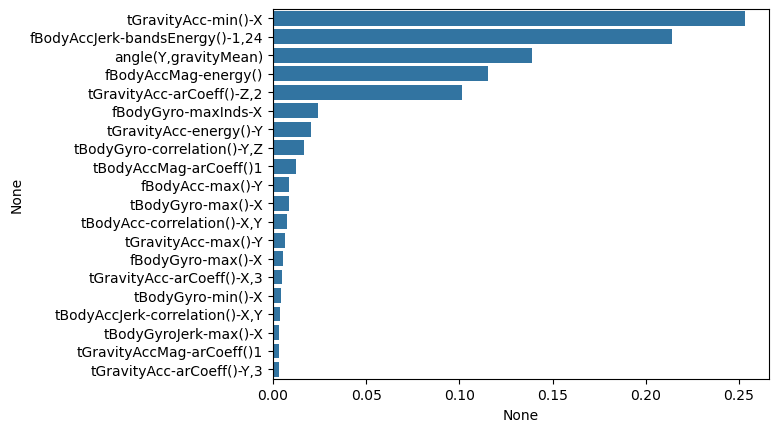

In [47]:
# 피처 : 561
# 피처 중요도 시각화
import seaborn as sns

ftr_importances_values= best_df_clf.feature_importances_
ftr_importances=pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top20=ftr_importances.sort_values(ascending=False)[:20]

sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

In [48]:
top20_col_names=ftr_top20.index.tolist()
# X_train[top20_col_names].head()
X_test[top20_col_names].head()

,tGravityAcc-min()-X,"fBodyAccJerk-bandsEnergy()-1,24","angle(Y,gravityMean)",fBodyAccMag-energy(),"tGravityAcc-arCoeff()-Z,2",fBodyGyro-maxInds-X,tGravityAcc-energy()-Y,"tBodyGyro-correlation()-Y,Z",tBodyAccMag-arCoeff()1,fBodyAcc-max()-Y,tBodyGyro-max()-X,"tBodyAcc-correlation()-X,Y",tGravityAcc-max()-Y,fBodyGyro-max()-X,"tGravityAcc-arCoeff()-X,3",tBodyGyro-min()-X,"tBodyAccJerk-correlation()-X,Y",tBodyGyroJerk-max()-X,tGravityAccMag-arCoeff()1,"tGravityAcc-arCoeff()-Y,3"
0,0.944461,-0.996894,0.276801,-0.953984,0.987180,-1.0,-0.864621,-0.301735,0.053780,-0.940137,-0.663411,0.076989,-0.279244,-0.904798,-0.431839,0.837100,-0.264860,-0.867914,0.053780,-0.780391
1,0.944461,-0.999197,0.281343,-0.998476,0.869290,-1.0,-0.858163,-0.533962,0.458489,-0.974357,-0.810337,-0.104983,-0.304870,-0.903511,-0.540245,0.823033,-0.153197,-0.959256,0.458489,-0.737390
2,0.948704,-0.999932,0.280083,-0.999570,0.440302,-1.0,-0.859947,-0.730050,0.141732,-0.983773,-0.873794,0.305653,-0.304870,-0.971987,-0.315239,0.823033,-0.063624,-0.981580,0.141732,-0.155203
3,0.947309,-0.999918,0.284114,-0.999504,0.303787,-1.0,-0.853713,-0.891736,0.131086,-0.987887,-0.873794,-0.063792,-0.305101,-0.958950,-0.375191,0.816059,-0.197876,-0.981580,0.131086,-0.169368
4,0.946221,-0.999935,0.290722,-0.999500,0.544317,-1.0,-0.843378,-0.918319,-0.075711,-0.972039,-0.881460,0.235151,-0.312552,-0.973502,-0.596321,0.816059,0.086585,-0.988357,-0.075711,-0.465463


In [49]:
X_train_top20=X_train[top20_col_names]
X_test_top20=X_test[top20_col_names]
X_train.shape, X_train_top20.shape, X_test.shape, X_test_top20.shape

((7352, 561), (7352, 20), (2947, 561), (2947, 20))

In [50]:
params={
    'max_depth':[6,8,10,12,16,20,24]
    , 'min_samples_split':[4,8,16,24]
}

grid_cv=GridSearchCV(
    dt_clf
    , param_grid=params
    , scoring='accuracy'
    , cv=5
    , verbose=1
    , n_jobs=-1
)

grid_cv.fit(X_train_top20, y_train)
print(f'최고 평균 정확도 : {grid_cv.best_score_:.4f}')
print(f'최적 하이퍼 파라미터 : {grid_cv.best_params_}')

Fitting 5 folds for each of 28 candidates, totalling 140 fits
최고 평균 정확도 : 0.8979
최적 하이퍼 파라미터 : {'max_depth': 8, 'min_samples_split': 8}
